# Algoritmos de Aprendizaje no supervisado - Grupo 86.
# Dataset Hierarchical Clustering
# Integrantes:
#### Martha Vanesa Paredes Molina
#### Brayan Antonio Baez Cumaco
#### Omar Ricardo Cortes Triana
# Pasos de la Actividad.
#### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
#### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
#### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
#### 4. Entrenar el modelo configurando los diferentes hiperparámetros.
#### 5. Evaluar el desempeño del modelo en el conjunto de Test con métricas como Coeficiente de Silhouette, indice de Calinski-Harabasz, etc.
#### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
#### 7. Interpretar, analizar y documentar los resultados obtenidos.
#### 8. Cargar los códigos de los modelos diseñados en GitHub.


In [358]:
# importamos las librerias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist                              
from IPython.display import display, HTML

import warnings
warnings.filterwarnings('ignore')




#### 1. Análisis exploratorio de los datos (EDA)


In [361]:
# Cargar los datos
df = pd.read_csv('Mall_Customers.csv')

# Vista inicial
display(HTML('<p style="margin-left: 190px; font-size:18px;">Vista General</p>'))
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [363]:
display(HTML('<p style="margin-left: 150px; font-size:18px;">Cantidad de columnas y registros</p>'))
# Información general
df.shape

(200, 5)

In [365]:
# Información general
display(HTML('<p style="margin-left: 190px; font-size:18px;">Información general</p>'))
df.info()

# Verificar valores nulos
display(HTML('<p style="margin-left: 150px; font-size:18px;">Verificación de valores nulos</p>'))
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [367]:
# Estadísticas descriptivas
display(HTML('<p style="margin-left: 170px; font-size:18px;">Estadisticas Descriptivas</p>'))
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


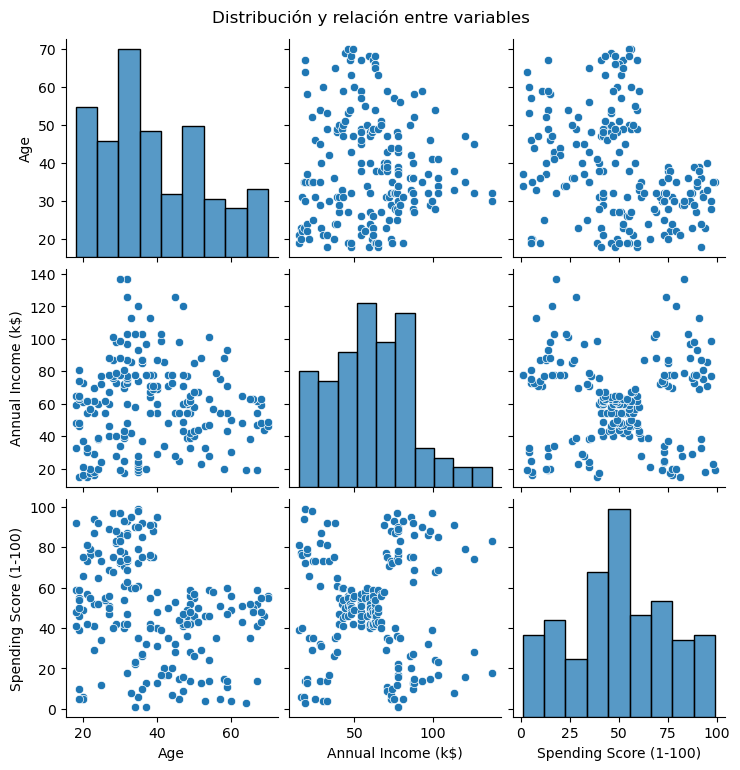

In [369]:
# Visualizaciones iniciales
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle("Distribución y relación entre variables", y=1.02)
plt.show()

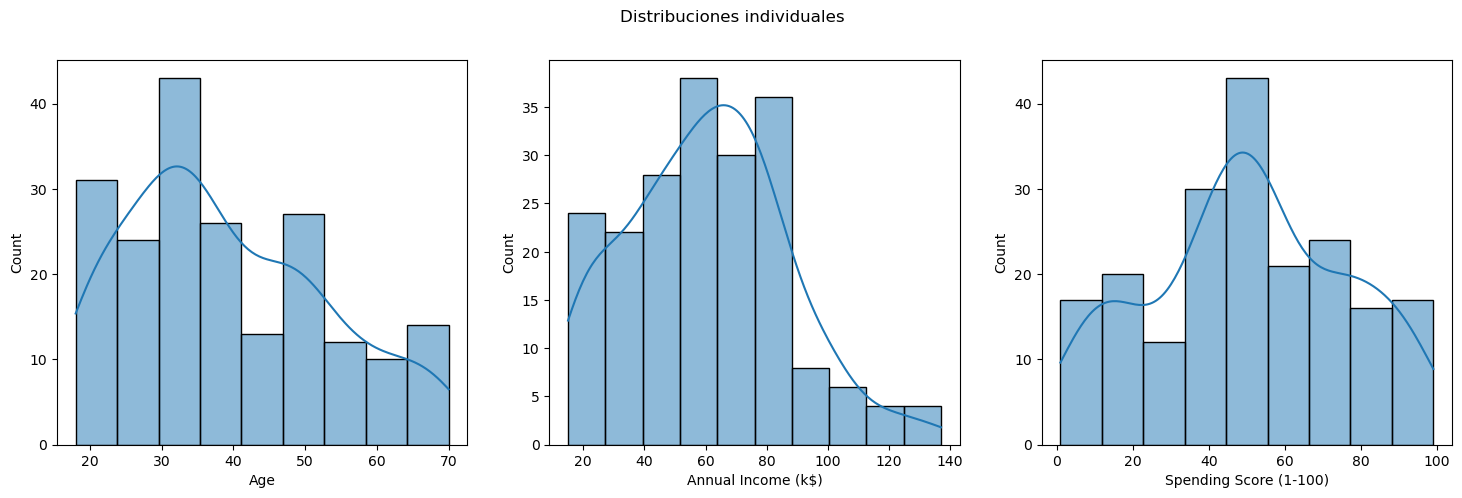

In [370]:
# Distribuciones
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(df['Age'], kde=True, ax=axs[0])
sns.histplot(df['Annual Income (k$)'], kde=True, ax=axs[1])
sns.histplot(df['Spending Score (1-100)'], kde=True, ax=axs[2])
plt.suptitle("Distribuciones individuales")
plt.show()

#### 2. Procesamiento de los datos

In [372]:
# Convertir 'Gender' a variable numérica
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
# Eliminar columnas irrelevantes (por ejemplo: CustomerID)
df_clean = df.drop(columns=['CustomerID'])

In [373]:
# Información general
display(HTML('<p style="margin-left: 190px; font-size:18px;">Conversión y eliminacion de columnas no relevantes</p>'))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   CustomerID              200 non-null    int64
 1   Gender                  200 non-null    int64
 2   Age                     200 non-null    int64
 3   Annual Income (k$)      200 non-null    int64
 4   Spending Score (1-100)  200 non-null    int64
dtypes: int64(5)
memory usage: 7.9 KB


#### 3. Selección de caracteristicas

In [379]:
# Seleccion de variables relevantes para clustering
features = df_clean[['Annual Income (k$)', 'Spending Score (1-100)']]

#### 4. Entrenamiento del modelo de Clustering jerarquico

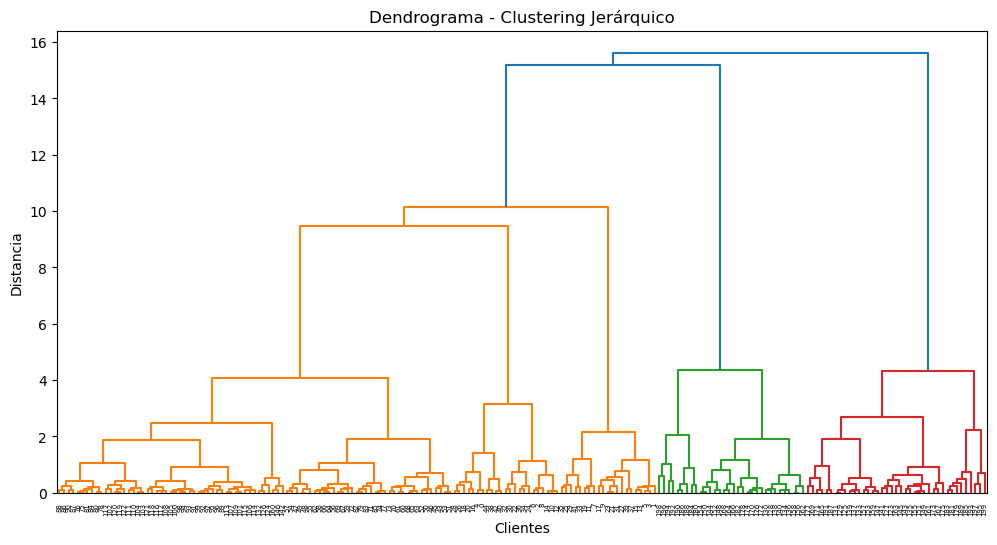

In [382]:
# Escalar datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# Crear el linkage matrix
linked = linkage(X_scaled, method='ward')

# Visualizar dendrograma
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=False)
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.show()

# Selección del número de clusters, por ejemplo: 5
n_clusters = 5
clusters = fcluster(linked, n_clusters, criterion='maxclust')

# Agregar clusters al dataframe original
df['Cluster'] = clusters
                 

#### 5. Evaluación del Modelo

In [384]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

sil_score = silhouette_score(X_scaled, clusters)
calinski_score = calinski_harabasz_score(X_scaled, clusters)

display(HTML('<p style="margin-left: 190px; font-size:18px;">Coeficiente de Silhoutte - Indice de Calinski-Harabasz</p>'))
print(f"Coeficiente de Silhouette: {sil_score:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_score:.2f}")

Coeficiente de Silhouette: 0.55
Índice de Calinski-Harabasz: 244.41


#### 6. Visualización de los resultados del modelo.

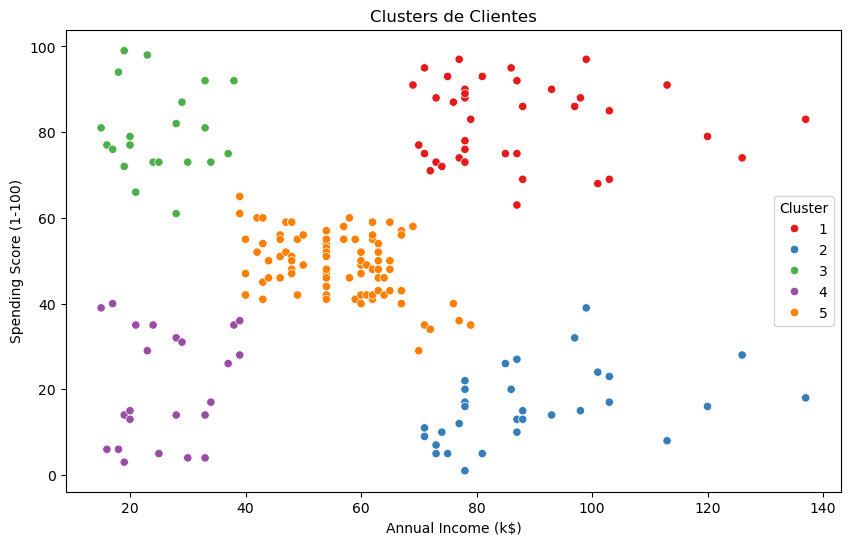

In [388]:
# Visualización de clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='Set1')
plt.title('Clusters de Clientes')
plt.show()

#### 7. Interpretación de resultado.

#### 1. Cluster 1: Clientes con altos ingresos y alto puntaje de gasto.


In [392]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> El presente grupo representa a los clientes más valiosos y estratégicamente importantes para el centro comercial. Se caracterizan por tener un elevado nivel de ingresos anuales, lo que les permite realizar compras de forma frecuente y sin grandes restricciones presupuestarias. Además, presentan un alto puntaje de gasto, lo cual indica que no solo tienen la capacidad económica, sino que también están dispuestos a gastar activamente. Este perfil de cliente es ideal para dirigir campañas de marketing personalizadas orientadas a productos de lujo, membresías exclusivas, eventos VIP o experiencias premium dentro del mall. Su comportamiento de consumo es coherente con un estilo de vida sofisticado, por lo que retener a estos clientes a través de beneficios exclusivos y atención diferenciada es clave para la rentabilidad del negocio. </p>'''))

#### 2. Cluster 2: Clientes con bajos ingresos y bajo puntaje de gasto.


In [395]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> El siguiente grupo está compuesto por individuos con un perfil económico limitado, tanto en ingresos como en gasto. Son visitantes que probablemente acuden al mall de forma esporádica y realizan compras puntuales, generalmente de productos básicos o durante promociones. No representan un segmento de alto valor comercial, pero sí pueden ser importantes desde el punto de vista de volumen si son numerosos. Las estrategias dirigidas a este grupo deben centrarse en descuentos, ofertas asequibles y programas de fidelidad que los incentiven a visitar con mayor frecuencia. También podrían responder bien a iniciativas sociales o educativas impulsadas por el centro comercial, con el objetivo de mejorar la percepción del mall como un espacio inclusivo y accesible para todos los perfiles. </p>'''))

#### 3. Cluster 3: Clientes jovenes con gasto elevado y nivel de ingreso medio.


In [398]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> Este segmento presenta un comportamiento de compra interesante: aunque no tienen los ingresos más altos, sus patrones de gasto son considerablemente elevados. Esto sugiere que están dispuestos a destinar una parte importante de sus recursos a experiencias de consumo, posiblemente motivados por tendencias, imagen personal o preferencias sociales. Se trata probablemente de clientes jóvenes, modernos y muy conectados con el entorno digital, lo que los convierte en un objetivo ideal para campañas de marketing por redes sociales, productos de moda, tecnología o entretenimiento. Aprovechar su disposición al gasto con promociones dirigidas a experiencias únicas puede aumentar tanto su fidelidad como su ticket promedio. </p>'''))

#### 4. Cluster 4: Clientes con alto ingreso pero bajo gasto.


In [401]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> Los clientes en este grupo tienen una capacidad adquisitiva alta, sin embargo, muestran un patrón de gasto bajo o conservador. Esto puede deberse a varios factores, como desinterés en la oferta actual del mall, actitudes ahorrativas o incluso falta de tiempo para realizar compras. Desde el punto de vista estratégico, este grupo representa una oportunidad latente: tienen el dinero, pero no están siendo incentivados correctamente a gastarlo. Analizar con mayor profundidad sus intereses, quizás mediante encuestas o análisis cualitativo, podría revelar necesidades no cubiertas. Una vez identificadas, se pueden diseñar campañas específicas, como ofertas de inversión, productos exclusivos, asesorías personalizadas o experiencias discretas pero premium. </p>'''))

#### 5. Cluter 5: Clientes con ingreso y gasto promedio.


In [404]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> Este grupo conforma la base estable del consumidor típico del mall. Sus niveles de ingreso y gasto se encuentran en rangos medios, lo que los convierte en un público confiable y constante. A pesar de no representar extremos en ninguno de los indicadores, su comportamiento es clave para la sostenibilidad operativa del centro comercial. Se trata de clientes predecibles, que probablemente tienen hábitos de compra establecidos y que valoran una buena relación calidad-precio. Para maximizar su rendimiento como segmento, se pueden aplicar estrategias de fidelización, promociones cruzadas (por ejemplo, cupones por visitar diferentes tiendas), y comunicación clara y frecuente que los mantenga conectados con las actividades del mall. </p>'''))

#### Conclusión.

In [407]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> El analisis del clustering jerarquico permitió segmentar a los clientes del centro comercial en cinco grupos claramente diferenciados, cada uno con caracteristicas socioeconomicas y conductas de gasto unicos. Esta segmentación no solo facilita la comprensión profunda del comportamiento de los usuarios, sino que tambien abre oportunidades para aplicar estrategias de marketing personalizados y efectivos. al identificar que clientes son rentables, cuales tienen potencial oculto y cuales requieren incentivos adicionales para aumentar su frecuencia de visita o su volumen de compra, optimizar la adignacion de recursos y el retorno de inversion en acciones comerciales. El uso de metricas como el coeficiente de Silhouette y el indice de Calinski-Harabasz confirma que la calidad del agrupamiento es adecuada, respaldando la validez de las decisiones basadas en los clusters. </p>'''))

#### 8. Repositorio en GitHub

In [410]:
display(HTML( '''<p style="text-align: justify; font-size:16px;"> https://github.com/Brayan-Gif-CMD/Tarea_4_hierarchical_clustering_Grupo_86.git </p>'''))